# Feature Engineering

**Tasks:** Encoding "Male/Female" into ```1/0```, scaling numbers so they are between 0 and 1, or creating new columns (like combining ```study_hours``` and ```sleep_hours```).

### Import Necessary Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Load The Clean Data

In [230]:
df = pd.read_csv('../data/notebookData/student_habits_performance_cleaned.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [231]:
df.head().T

,0,1,2,3,4
student_id,S1000,S1001,S1002,S1003,S1004
age,23,20,21,23,19
gender,Female,Female,Male,Female,Female
study_hours_per_day,0.0,6.9,1.4,1.0,5.0
social_media_hours,1.2,2.8,3.1,3.9,4.4
netflix_hours,1.1,2.3,1.3,1.0,0.5
part_time_job,No,No,No,No,No
attendance_percentage,85.0,97.3,94.8,71.0,90.9
sleep_hours,8.0,4.6,8.0,9.2,4.9
diet_quality,Fair,Good,Poor,Poor,Fair


In [232]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

### Let's find the Categories column

In [233]:
"""
This looks for columns where the data type is object (usually text or strings).
Columns like Name, Gender, or Education_Level are caught here.

This looks for numeric columns that have fewer than 10 unique values.
Why? If a numeric column only has values like [0, 1, 2], it's likely a category (e.g., 0=Low, 1=Med, 2=High) rather than a continuous measurement like Price or Distance.
we chose 10 as our threshold, which is a common standard in data science.
"""
text_df = df.copy() 
cat_cols = [col for col in text_df.columns if text_df[col].dtype == 'object']
cat_cols += [col for col in text_df.columns if text_df[col].nunique() < 10 and text_df[col].dtype != 'object']
cat_cols = list(set(cat_cols))
cat_cols.sort()
cat_cols

['age',
 'diet_quality',
 'exercise_frequency',
 'extracurricular_participation',
 'gender',
 'internet_quality',
 'parental_education_level',
 'part_time_job',
 'student_id']

In [234]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols = list(set(cat_cols))
cat_cols.remove('student_id')
cat_cols.sort()
cat_cols

['diet_quality',
 'extracurricular_participation',
 'gender',
 'internet_quality',
 'parental_education_level',
 'part_time_job']

In [235]:
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: diet_quality
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64


Column: extracurricular_participation
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


Column: gender
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64


Column: internet_quality
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64


Column: parental_education_level
parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64


Column: part_time_job
part_time_job
No     785
Yes    215
Name: count, dtype: int64




### Visualisation of the distributions

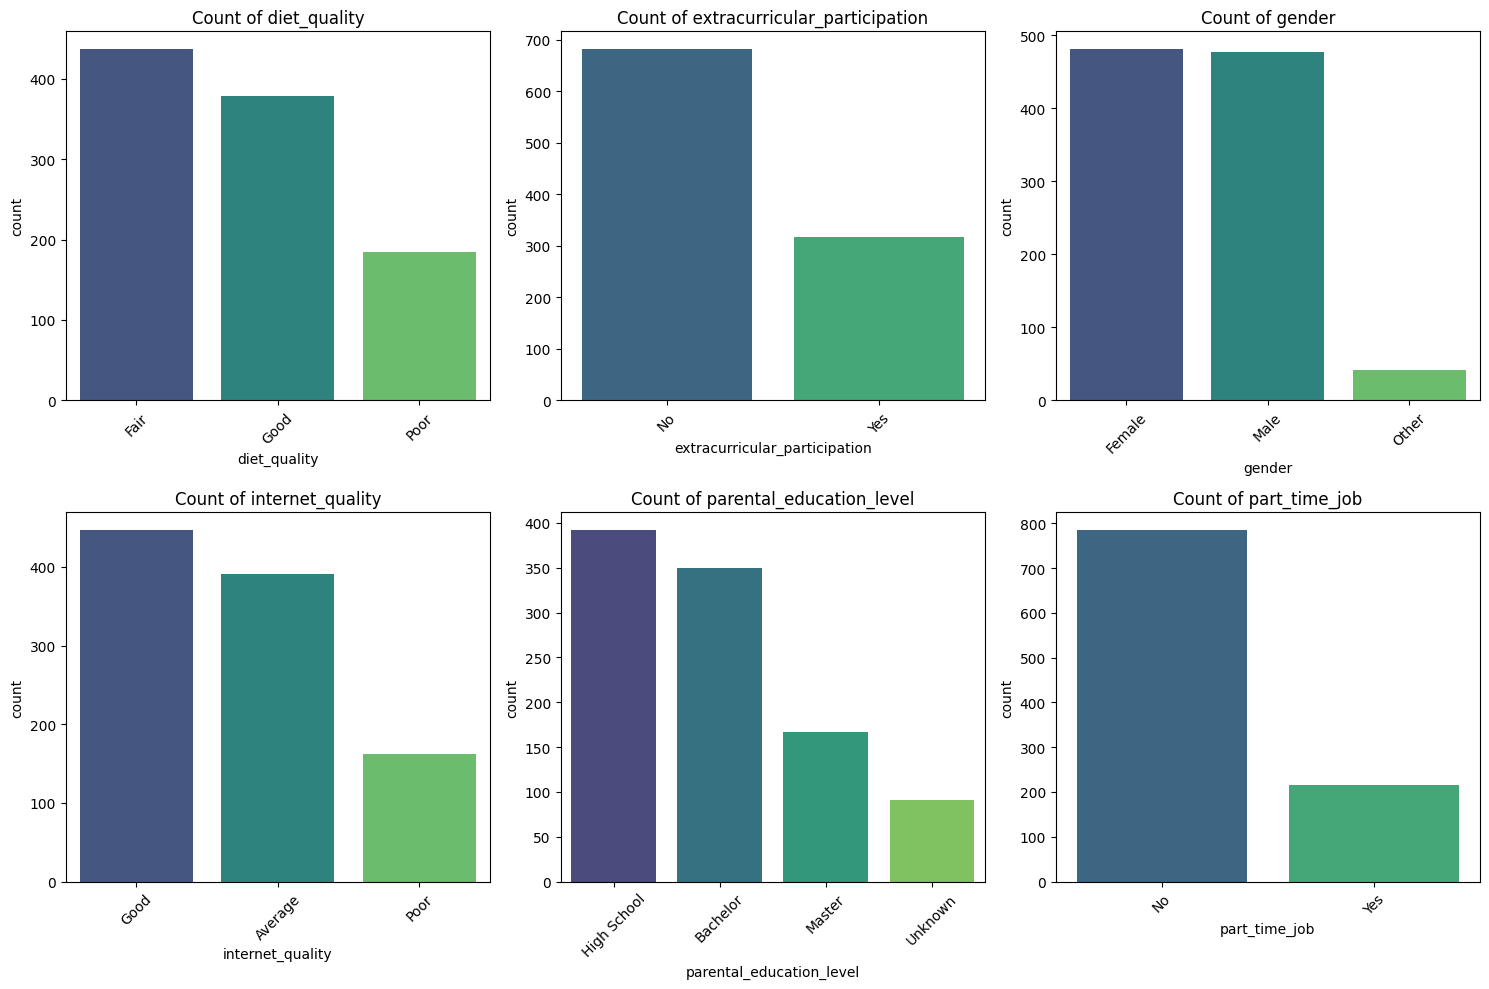

In [236]:
# Visualize Categorical Distributions
# cat_cols = [
#     'diet_quality',
#     'extracurricular_participation',
#     'gender',
#     'internet_quality',
#     'parental_education_level',
#     'part_time_job']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    # Sorting by count makes the chart easier to read
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [237]:
df[cat_cols].describe().T

,count,unique,top,freq
diet_quality,1000,3,Fair,437
extracurricular_participation,1000,2,No,682
gender,1000,3,Female,481
internet_quality,1000,3,Good,447
parental_education_level,1000,4,High School,392
part_time_job,1000,2,No,785


In [238]:
df[cat_cols].nunique().sort_values(ascending=False)

parental_education_level         4
diet_quality                     3
gender                           3
internet_quality                 3
extracurricular_participation    2
part_time_job                    2
dtype: int64

### Let's find the Numerical column

In [239]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'student_id']
num_cols.sort()
num_cols


['age',
 'attendance_percentage',
 'exam_score',
 'exercise_frequency',
 'mental_health_rating',
 'netflix_hours',
 'sleep_hours',
 'social_media_hours',
 'study_hours_per_day']

In [240]:
for col in num_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: age
age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64


Column: attendance_percentage
attendance_percentage
100.0    66
85.8     12
85.3      8
83.2      7
81.7      7
         ..
89.7      1
62.5      1
97.2      1
93.1      1
61.9      1
Name: count, Length: 320, dtype: int64


Column: exam_score
exam_score
100.0    48
80.9      7
74.0      7
70.7      7
65.6      7
         ..
60.2      1
94.6      1
93.4      1
71.7      1
66.2      1
Name: count, Length: 480, dtype: int64


Column: exercise_frequency
exercise_frequency
3    153
6    152
5    149
1    146
0    144
4    134
2    122
Name: count, dtype: int64


Column: mental_health_rating
mental_health_rating
4     110
6     108
8     105
3     105
1     102
10     99
5      99
2      94
7      91
9      87
Name: count, dtype: int64


Column: netflix_hours
netflix_hours
0.0    59
2.0    48
1.7    41
1.4    40
1.6    39
2.3    37
2.2    35
2.4    34
2.1    33
0.9    

### Visualisation of the distributions

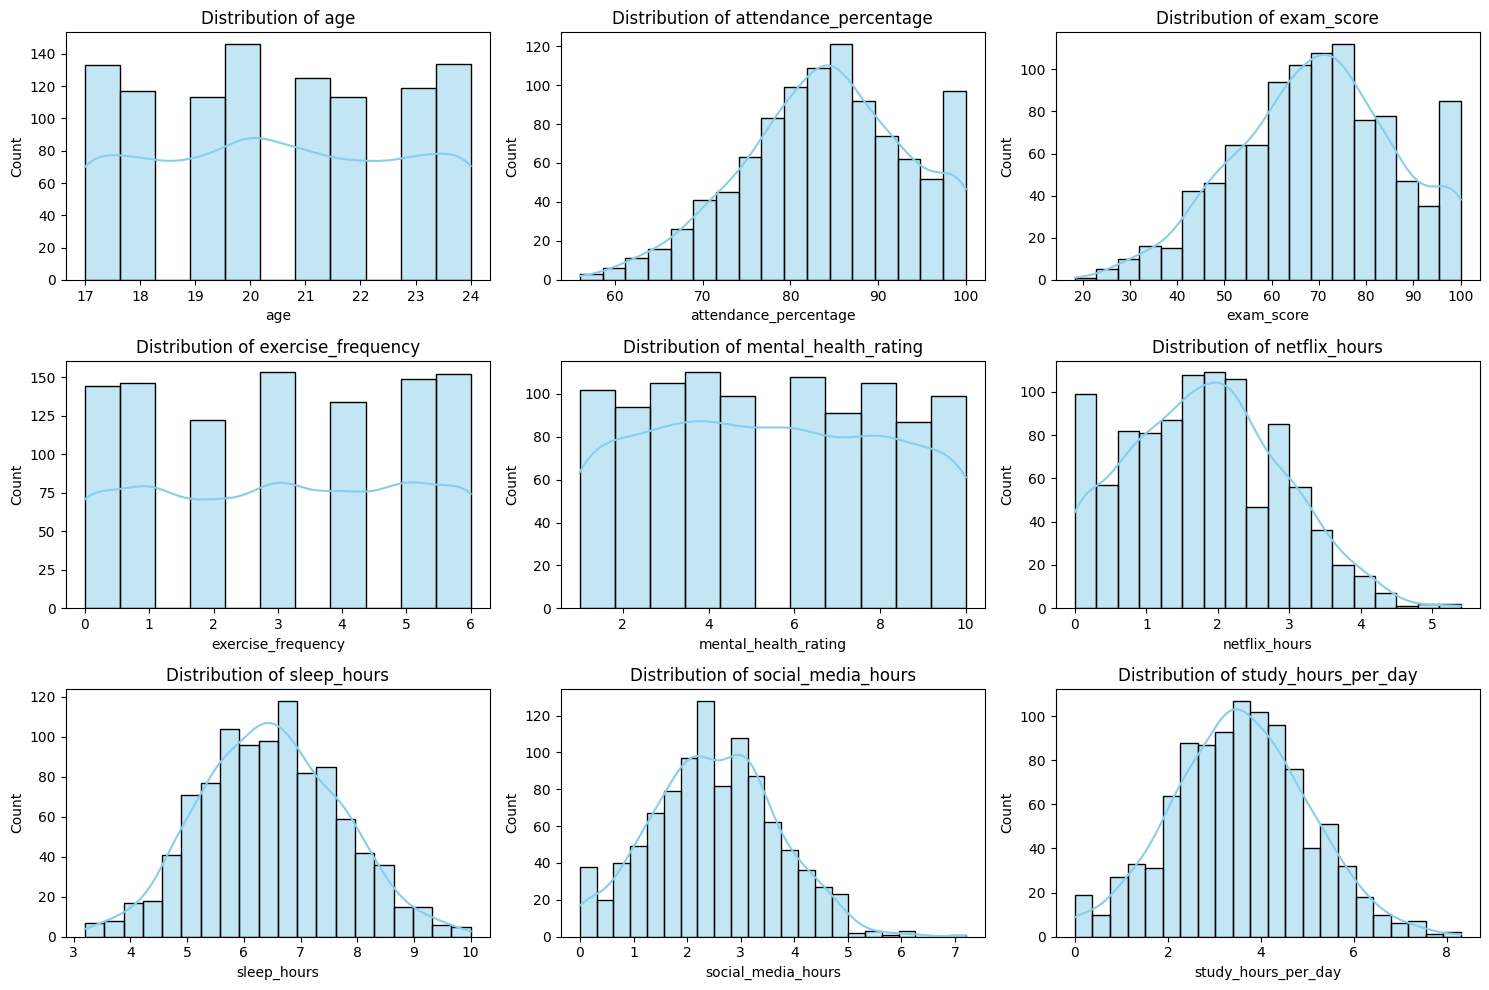

In [241]:
# 1. Visualize Numerical Distributions
# num_cols = ['age', 'study_hours_per_day', 'exam_score', 'mental_health_rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [242]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3


In [243]:
df[num_cols].nunique().sort_values(ascending=False)

exam_score               480
attendance_percentage    320
study_hours_per_day       78
sleep_hours               68
social_media_hours        60
netflix_hours             51
mental_health_rating      10
age                        8
exercise_frequency         7
dtype: int64

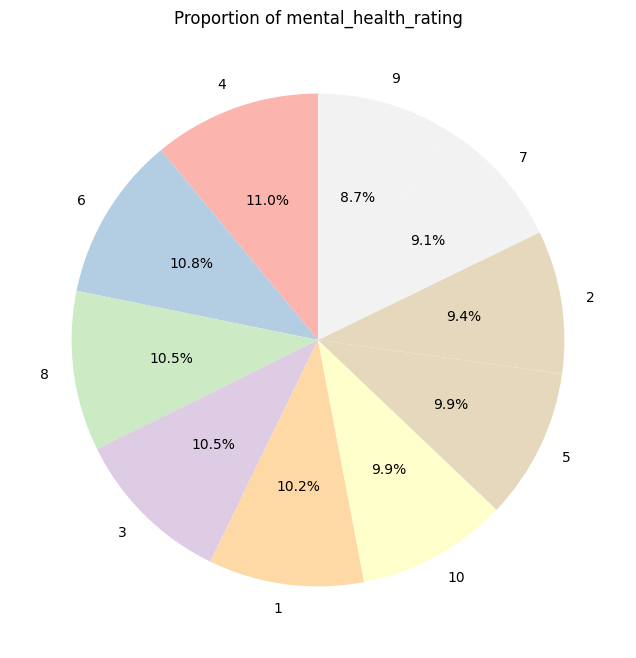

['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


In [244]:
# Let's pick a column like 'mental_health_rating' or 'age'
column_to_plot = 'mental_health_rating'

plt.figure(figsize=(8, 8))
df[column_to_plot].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title(f'Proportion of {column_to_plot}')
plt.ylabel('') # Hides the column name on the side
plt.show()
print(df.columns.tolist())

In [245]:
df[cat_cols].describe().T

,count,unique,top,freq
diet_quality,1000,3,Fair,437
extracurricular_participation,1000,2,No,682
gender,1000,3,Female,481
internet_quality,1000,3,Good,447
parental_education_level,1000,4,High School,392
part_time_job,1000,2,No,785


In [246]:
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: diet_quality
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64


Column: extracurricular_participation
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


Column: gender
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64


Column: internet_quality
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64


Column: parental_education_level
parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64


Column: part_time_job
part_time_job
No     785
Yes    215
Name: count, dtype: int64




### Encoding and Scaling

Encoding is the process of converting **Categorical** Data (text-based labels like "Male", "Bachelor", or "Good") into **Numerical Data** (0, 1, 2) so that a machine learning model can perform mathematical calculations on them.


**Ordinal Encoding (Label Encoding)**

 Used when the categories have a **natural rank or order**.
 
 -  **Example:** Education levels or Quality ratings.
 
 -  **How it works:** It assigns a number based on the "weight" of the category.
 
    -  Unknown $\rightarrow$ 0
    -   High School $\rightarrow$ 1
    -   Bachelor $\rightarrow$ 
    -   Master $\rightarrow$ 

    **We will use it for**:  ```parental_education_level```, ```internet_quality```, and ```diet_quality```.

In [247]:
# Lets copy the data first for safety
df_encoded = df.copy()

# Define the logical weights for each category
# Note: Higher numbers represent 'more' or 'better' of that feature
ordinal_mappings = {
    'parental_education_level': {
        'Unknown': 0, 
        'High School': 1, 
        'Bachelor': 2, 
        'Master': 3
    },
    'internet_quality': {
        'Poor': 1, 
        'Average': 2, 
        'Good': 3
    },
    'diet_quality': {
        'Poor': 1, 
        'Fair': 2, 
        'Good': 3
    }
}

# Apply the mapping to each column
for col, mapping in ordinal_mappings.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# Check the results for these columns
print(f"--- BEFORE Ordinal Encoding ---")
display(df[['parental_education_level', 'internet_quality', 'diet_quality']].head())

print(f"\n--- AFTER Ordinal Encoding ---")
display(df_encoded[['parental_education_level', 'internet_quality', 'diet_quality']].head())

--- BEFORE Ordinal Encoding ---


,parental_education_level,internet_quality,diet_quality
0,Master,Average,Fair
1,High School,Average,Good
2,High School,Poor,Poor
3,Master,Good,Poor
4,Master,Good,Fair



--- AFTER Ordinal Encoding ---


,parental_education_level,internet_quality,diet_quality
0,3,2,2
1,1,2,3
2,1,1,1
3,3,3,1
4,3,3,2



</br>

### **One-Hot Encoding**

Used when there is **no order** between categories.

-   **Example:** Gender or City.

-   **How it works:** It creates new columns for each category and uses ```1``` to indicate "Yes" and ```0``` for "No".

    -   If a student is "Male," the ```gender_Male``` column gets a ```1```, and ```gender_Other``` gets a ```0```.

**We will use it for**: ```gender```.

In [248]:
print("--- BEFORE One-Hot Encoding ---")
display(df_encoded[['gender']].head())

# Apply One-Hot Encoding
# drop_first=True: Removes the first category (Female) to prevent redundant data.
# dtype=int: Ensures the result is 0 and 1 instead of True/False.
df_encoded = pd.get_dummies(df_encoded, columns=['gender'], drop_first=True, dtype=int)

print("\n--- AFTER One-Hot Encoding ---")
# The new columns will be named 'gender_Male' and 'gender_Other'
display(df_encoded[['gender_Male', 'gender_Other']].head())

--- BEFORE One-Hot Encoding ---


,gender
0,Female
1,Female
2,Male
3,Female
4,Female



--- AFTER One-Hot Encoding ---


,gender_Male,gender_Other
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


Since we used ```drop_first=True``` the ```gender_Female``` column was dropped. Here is how the model "reads" the new columns:

- **If** ```gender_Male``` **= 1**: The student is Male.

- **If** ```gender_Other``` **= 1**: The student is Other.

- **If BOTH are 0**: The student is Female.

</br>

### **Binary Encoding**

A simple version of One-Hot encoding used for "Yes/No"questions.

-   **How it works:** No $\rightarrow$ 0, Yes $\rightarrow$ 1.

-   **We will use**: this for  ```part_time_job``` and ```extracurricular_participation```.

In [249]:
binary_encoding_config = {
    'part_time_job': {'No': 0, 'Yes': 1},
    'extracurricular_participation': {'No': 0, 'Yes': 1}
}

print("--- BEFORE Binary Encoding ---")
display(df_encoded[list(binary_encoding_config.keys())].head())

# Apply the maps
for col, mapping in binary_encoding_config.items():
    df_encoded[col] = df_encoded[col].map(mapping)

print("\n--- AFTER Binary Encoding ---")
display(df_encoded[list(binary_encoding_config.keys())].head())

--- BEFORE Binary Encoding ---


,part_time_job,extracurricular_participation
0,No,Yes
1,No,No
2,No,No
3,No,Yes
4,No,No



--- AFTER Binary Encoding ---


,part_time_job,extracurricular_participation
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0


Let's see the Final dtypes

In [250]:
df_encoded.dtypes

student_id                        object
age                                int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level           int64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation      int64
exam_score                       float64
gender_Male                        int64
gender_Other                       int64
dtype: object

In [251]:
df_encoded.head().T

,0,1,2,3,4
student_id,S1000,S1001,S1002,S1003,S1004
age,23,20,21,23,19
study_hours_per_day,0.0,6.9,1.4,1.0,5.0
social_media_hours,1.2,2.8,3.1,3.9,4.4
netflix_hours,1.1,2.3,1.3,1.0,0.5
part_time_job,0,0,0,0,0
attendance_percentage,85.0,97.3,94.8,71.0,90.9
sleep_hours,8.0,4.6,8.0,9.2,4.9
diet_quality,2,3,1,1,2
exercise_frequency,6,6,1,4,3


### Remove or Dropping Columns

Before we move to Feature Selection, we must remove student_id.

-   **Why?** It is an "Object" (text) type.

-   **The Math**: Because it has 1,000 unique values (one for every student), it acts like a name. A model cannot "learn" from names; it would just try to memorize which ID got which score, which is useless for predicting scores for new students.

In [252]:
# Final drop of the non-predictive ID column
df_encoded = df_encoded.drop(columns=['student_id'], errors='ignore')
# Verify it's gone
print(df_encoded.columns)

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'gender_Male', 'gender_Other'],
      dtype='object')


In [253]:
df_encoded.dtypes

age                                int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level           int64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation      int64
exam_score                       float64
gender_Male                        int64
gender_Other                       int64
dtype: object

In [254]:
df_encoded.head().T

,0,1,2,3,4
age,23.0,20.0,21.0,23.0,19.0
study_hours_per_day,0.0,6.9,1.4,1.0,5.0
social_media_hours,1.2,2.8,3.1,3.9,4.4
netflix_hours,1.1,2.3,1.3,1.0,0.5
part_time_job,0.0,0.0,0.0,0.0,0.0
attendance_percentage,85.0,97.3,94.8,71.0,90.9
sleep_hours,8.0,4.6,8.0,9.2,4.9
diet_quality,2.0,3.0,1.0,1.0,2.0
exercise_frequency,6.0,6.0,1.0,4.0,3.0
parental_education_level,3.0,1.0,1.0,3.0,3.0


In [255]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   study_hours_per_day            1000 non-null   float64
 2   social_media_hours             1000 non-null   float64
 3   netflix_hours                  1000 non-null   float64
 4   part_time_job                  1000 non-null   int64  
 5   attendance_percentage          1000 non-null   float64
 6   sleep_hours                    1000 non-null   float64
 7   diet_quality                   1000 non-null   int64  
 8   exercise_frequency             1000 non-null   int64  
 9   parental_education_level       1000 non-null   int64  
 10  internet_quality               1000 non-null   int64  
 11  mental_health_rating           1000 non-null   int64  
 12  extracurricular_participation  1000 non-null   in

In [256]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
part_time_job,1000.0,0.2150,0.411028,0.0,0.000,0.0,0.000,1.0
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
diet_quality,1000.0,2.1930,0.725450,1.0,2.000,2.0,3.000,3.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
parental_education_level,1000.0,1.5930,0.870695,0.0,1.000,2.0,2.000,3.0


### Save The Encoded Data

In [ ]:
# Save the cleaned and encoded data for the next stage
df_encoded.to_csv('../data/notebookData/final_encoded_data.csv', index=False)
print("Success! 'final_encoded_data.csv' has been saved.")

Success! 'final_encoded_data.csv' has been saved.


### This is for ```src/step/c_feature_engineering.py```

In [ ]:
from error_logs import configure_logger
logger = configure_logger()


def features_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs Ordinal, One-Hot, and Binary encoding on the dataset.
    Removes non-predictive ID columns.
    """
    try:
        logger.info("==> Starting Feature Engineering...")
        df_feat = df.copy()

        # Safety: Remove ID if it exists (IDs are not features!)
        if 'student_id' in df_feat.columns:
            df_feat = df_feat.drop(columns=['student_id'])
            logger.info("==> Feature Engineering: Removed 'student_id'.")

        # Ordinal Encoding (Mapped by Rank/Logic)
        ordinal_mappings = {
            'parental_education_level': {'Unknown': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3},
            'internet_quality': {'Poor': 1, 'Average': 2, 'Good': 3},
            'diet_quality': {'Poor': 1, 'Fair': 2, 'Good': 3}
        }
        for col, mapping in ordinal_mappings.items():
            if col in df_feat.columns:
                df_feat[col] = df_feat[col].map(mapping)
        logger.info("==> Ordinal Encoding complete for Education, Internet, and Diet.")

        # 4. One-Hot Encoding (No natural order)
        if 'gender' in df_feat.columns:
            df_feat = pd.get_dummies(df_feat, columns=['gender'], drop_first=True, dtype=int)
            logger.info("==> One-Hot Encoding complete for Gender.")

        # Binary Encoding (Yes/No to 0/1)
        binary_encoding = {
            'part_time_job': {'No': 0, 'Yes': 1},
            'extracurricular_participation': {'No': 0, 'Yes': 1}
        }
        for col, mapping in binary_encoding.items():
            if col in df_feat.columns:
                df_feat[col] = df_feat[col].map(mapping)
        logger.info("==> Binary Encoding complete for Job and Participation.")

        # Final check: Ensure all dtypes are numeric
        logger.info(f"==> Feature Engineering complete. Final columns: {df_feat.columns.tolist()}")
        return df_feat

    except Exception as e:
        logger.error(f"Error in Feature Engineering: {e}")
        return None